In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from distfit import distfit

In [2]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [3]:
!python -V

Python 3.10.13


In [4]:
%pip list

Package                      Version        Editable project location
---------------------------- -------------- ---------------------------
absl-py                      2.1.0
accelerate                   0.26.0
aiohappyeyeballs             2.4.3
aiohttp                      3.11.8
aiosignal                    1.3.1
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-timeout                5.0.1
attrs                        24.2.0
beautifulsoup4               4.11.1
blis                         0.7.11
boto3                        1.35.71
botocore                     1.35.71
cachetools                   5.5.0
catalogue                    2.0.10
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
clarabel                     0.9.0
click                        7.1.2
colorama                     0.4.6
coloredlogs                  15.0.1
colourmap                    1.1.19
c

### investments tickers

In [5]:
symbol_type = "ETF"

In [6]:
yf_market_info  = pd.read_csv('../data/market_info.csv')

In [7]:
ticker_info_df = yf_market_info[yf_market_info.symbol_type==symbol_type].reset_index()
ticker_list = list(ticker_info_df.symbol)

In [8]:
ticker_symbols  = " ".join(ticker_list)

In [9]:
#ticker_symbols = ticker_symbols + " EURGBP=X"

In [10]:
data = yf.download(ticker_symbols, period='1y')
data.head(20)

[*********************100%***********************]  8 of 8 completed


Price         Close                                                       \
Ticker       C300.L   CNKY.L     FLXI.L     FTAL.L     FVUB.L     HMAF.L   
Date                                                                       
2024-01-16  4.06300  19236.0  40.375000  61.080002  21.562500  32.985001   
2024-01-17  3.96700  18732.0  39.595001  60.139999  21.334999  32.014999   
2024-01-18  4.02800  19003.5  39.902500  60.259998  21.129999  32.509998   
2024-01-19  4.04350  19117.0  40.365002  60.240002  21.047501  32.650002   
2024-01-22  3.98050  19376.0  40.587502  60.610001  20.785000  32.314999   
2024-01-23  4.03700  19237.0  39.430000  60.575001  20.915001  32.939999   
2024-01-24  4.15200  19220.0  40.132500  60.930000  21.209999  33.455002   
2024-01-25  4.11650  19141.0  40.014999  60.924999  21.270000  33.430000   
2024-01-26  4.13550  19041.0  40.064999  61.724998  21.325001  33.419998   
2024-01-29  4.05125  19074.0  40.617500  61.680000  21.245001  33.200001   
2024-01-30  3.97250  19109.0  40.200001  61.900002  21.080000  32.994999   
2024-01-31  3.98650  19174.0  40.865002  61.705002  21.334999  32.759998   
2024-02-01  3.95500  19190.0  40.654999  61.419998  21.222500  32.845001   
2024-02-02  3.85250  19225.0  40.852501  61.410000  21.055000  32.930000   
2024-02-05  3.89050  19274.5  40.792500  61.290001  21.049999  33.279999   
2024-02-06  4.06825  19191.0  41.547501  61.855000  21.712500  34.115002   
2024-02-07  4.09175  19274.0  41.605000  61.419998  21.514999  34.040001   
2024-02-08  4.08900  19495.5  41.244999  61.220001  21.225000  34.035000   
2024-02-09  4.07050  19503.5  41.305000  60.965000  21.170000  33.994999   
2024-02-12  4.11875  19786.0  41.007500  61.040001  21.522499  34.744999   

Price                           High                ...    Open           \
Ticker      S600.L   SPXP.L   C300.L        CNKY.L  ...  S600.L   SPXP.L   
Date                                                ...                    
2024-01-16  9627.0  73350.5  4.06100  19239.000000  ...  9635.0  73148.0   
2024-01-17  9494.5  72854.0  3.98400  18891.800781  ...  9507.0  72969.0   
2024-01-18  9547.5  73061.0  4.02800  19046.000000  ...  9531.0  72735.0   
2024-01-19  9549.5  73823.0  4.04350  19168.099609  ...  9563.0  73568.0   
2024-01-22  9602.0  74346.5  3.98050  19415.644531  ...  9595.0  74317.0   
2024-01-23  9566.0  74488.5  4.02700  19283.000000  ...  9607.0  74190.0   
2024-01-24  9678.0  74769.5  4.15200  19306.000000  ...  9641.0  74756.0   
2024-01-25  9676.5  75027.5  4.10700  19199.000000  ...  9651.0  74513.0   
2024-01-26  9801.0  75044.0  4.13600  19002.468750  ...  9801.0  74827.0   
2024-01-29  9791.5  75145.0  4.05125  19097.000000  ...  9768.0  74945.0   
2024-01-30  9859.0  75721.5  3.97250  19171.000000  ...  9850.0  75517.0   
2024-01-31  9824.0  74817.5  3.98650  19300.751953  ...  9824.0  75411.0   
2024-02-01  9789.0  74475.5  3.95500  19354.000000  ...  9796.0  74813.0   
2024-02-02  9800.0  76160.0  3.89250  19240.000000  ...  9789.0  75351.0   
2024-02-05  9815.5  76620.0  3.88450  19367.000000  ...  9825.0  76381.0   
2024-02-06  9869.5  76545.0  4.07700  19273.000000  ...  9875.0  76797.0   
2024-02-07  9811.5  76942.5  4.08450  19288.000000  ...  9813.0  76368.0   
2024-02-08  9820.5  77043.5  4.08900  19563.000000  ...  9820.5  77095.0   
2024-02-09  9811.5  77272.5  4.07050  19598.000000  ...  9811.5  77108.0   
2024-02-12  9861.5  77809.0  4.11875  19786.000000  ...  9844.0  77435.0   

Price       Volume                                                   
Ticker      C300.L CNKY.L FLXI.L FTAL.L FVUB.L HMAF.L S600.L SPXP.L  
Date                                                                 
2024-01-16   895.0    358  19085  22713    666   5655     69    657  
2024-01-17   306.0   1809   6978   6163    177   4518    112   1889  
2024-01-18     0.0    598  15082   9457   1310    127    106   1688  
2024-01-19     0.0    489  11488   2487    259  18710      3   1544  
2024-01-22  

In [11]:
data.columns

MultiIndex([( 'Close', 'C300.L'),
            ( 'Close', 'CNKY.L'),
            ( 'Close', 'FLXI.L'),
            ( 'Close', 'FTAL.L'),
            ( 'Close', 'FVUB.L'),
            ( 'Close', 'HMAF.L'),
            ( 'Close', 'S600.L'),
            ( 'Close', 'SPXP.L'),
            (  'High', 'C300.L'),
            (  'High', 'CNKY.L'),
            (  'High', 'FLXI.L'),
            (  'High', 'FTAL.L'),
            (  'High', 'FVUB.L'),
            (  'High', 'HMAF.L'),
            (  'High', 'S600.L'),
            (  'High', 'SPXP.L'),
            (   'Low', 'C300.L'),
            (   'Low', 'CNKY.L'),
            (   'Low', 'FLXI.L'),
            (   'Low', 'FTAL.L'),
            (   'Low', 'FVUB.L'),
            (   'Low', 'HMAF.L'),
            (   'Low', 'S600.L'),
            (   'Low', 'SPXP.L'),
            (  'Open', 'C300.L'),
            (  'Open', 'CNKY.L'),
            (  'Open', 'FLXI.L'),
            (  'Open', 'FTAL.L'),
            (  'Open', 'FVUB.L'),
            ( 

### returns

In [12]:
yf_period = "10y" # ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
yf_interval = "1d"

In [13]:
#  1.  Create dataframe yf_price with yf.download
yf_df = yf.download(
        tickers = ticker_symbols,       # tickers list or string as well
        period = yf_period,      # optional, default is '1mo'
        interval = yf_interval,  # fetch data by intervaal
        group_by = 'ticker',     # group by ticker
        auto_adjust = True,      # adjust all OHLC (open-high-low-close)
        prepost = True,          # download market hours data
        threads = True,          # threads for mass downloading
        proxy = None)            # proxy

#  2.  Select 'Close' (price at market close) column only
yf_df = yf_df.iloc[:, yf_df.columns.get_level_values(1)=='Close']

#  3.  Remove the dataframe multi-index
yf_df.columns = yf_df.columns.droplevel(1)  # multi-index

#yf_returns_df = round(yf_returns.pct_change()*100, 4)

#yf_returns_df.tail(10)

[*********************100%***********************]  8 of 8 completed


In [14]:
yf_df.tail(20)

Ticker,FLXI.L,HMAF.L,CNKY.L,SPXP.L,C300.L,FVUB.L,S600.L,FTAL.L
Date,,,,,,,,
2024-12-17,45.459999,39.570000,20225.0,93831.0,4.95225,16.889999,10339.0,68.360001
2024-12-18,45.165001,39.825001,20208.5,94151.0,4.95225,16.495001,10340.0,68.320000
2024-12-19,44.779999,39.599998,19881.0,92846.5,4.92625,16.641001,10199.0,67.709999
2024-12-20,44.400002,39.630001,19929.0,93283.0,4.93150,16.614000,10144.0,67.510002
2024-12-23,44.020000,40.035000,19917.0,93426.0,4.92425,16.481001,10174.0,67.660004
2024-12-24,44.080002,40.255001,19946.0,93939.0,4.99900,16.480000,10193.0,68.089996
2024-12-27,43.952499,39.825001,20271.0,93450.5,4.99125,16.349001,10218.0,68.055000
2024-12-30,43.639999,39.720001,20126.0,93023.0,4.97775,16.319000,10185.0,67.875000
2024-12-31,43.775002,39.700001,20132.0,93254.0,4.89625,16.420000,10243.0,68.349998


In [15]:
yf_df.isnull().sum()

Ticker
FLXI.L    1121
HMAF.L       0
CNKY.L       0
SPXP.L       0
C300.L    1848
FVUB.L    1106
S600.L       1
FTAL.L       0
dtype: int64

In [16]:
#yf_df.dropna(inplace=True)

In [17]:
daily_returns_df = yf_df.pct_change()

In [18]:
daily_returns_df.mean(skipna=True)

Ticker
FLXI.L    0.000477
HMAF.L    0.000364
CNKY.L    0.000400
SPXP.L    0.000631
C300.L    0.000106
FVUB.L   -0.000052
S600.L    0.000345
FTAL.L    0.000284
dtype: float64

In [19]:
daily_returns_df.std(skipna=True)

Ticker
FLXI.L    0.014210
HMAF.L    0.018161
CNKY.L    0.010602
SPXP.L    0.009965
C300.L    0.015017
FVUB.L    0.020949
S600.L    0.009586
FTAL.L    0.009668
dtype: float64

In [20]:
daily_returns_df.kurtosis()

Ticker
FLXI.L     34.254260
HMAF.L    469.094544
CNKY.L      5.476340
SPXP.L      4.499179
C300.L      6.458861
FVUB.L     11.795559
S600.L      4.947313
FTAL.L      9.241220
dtype: float64

In [21]:
daily_returns_df.skew()

Ticker
FLXI.L    1.047232
HMAF.L    9.571409
CNKY.L   -0.299892
SPXP.L   -0.282585
C300.L    0.446824
FVUB.L   -1.220925
S600.L   -0.244202
FTAL.L   -0.564096
dtype: float64

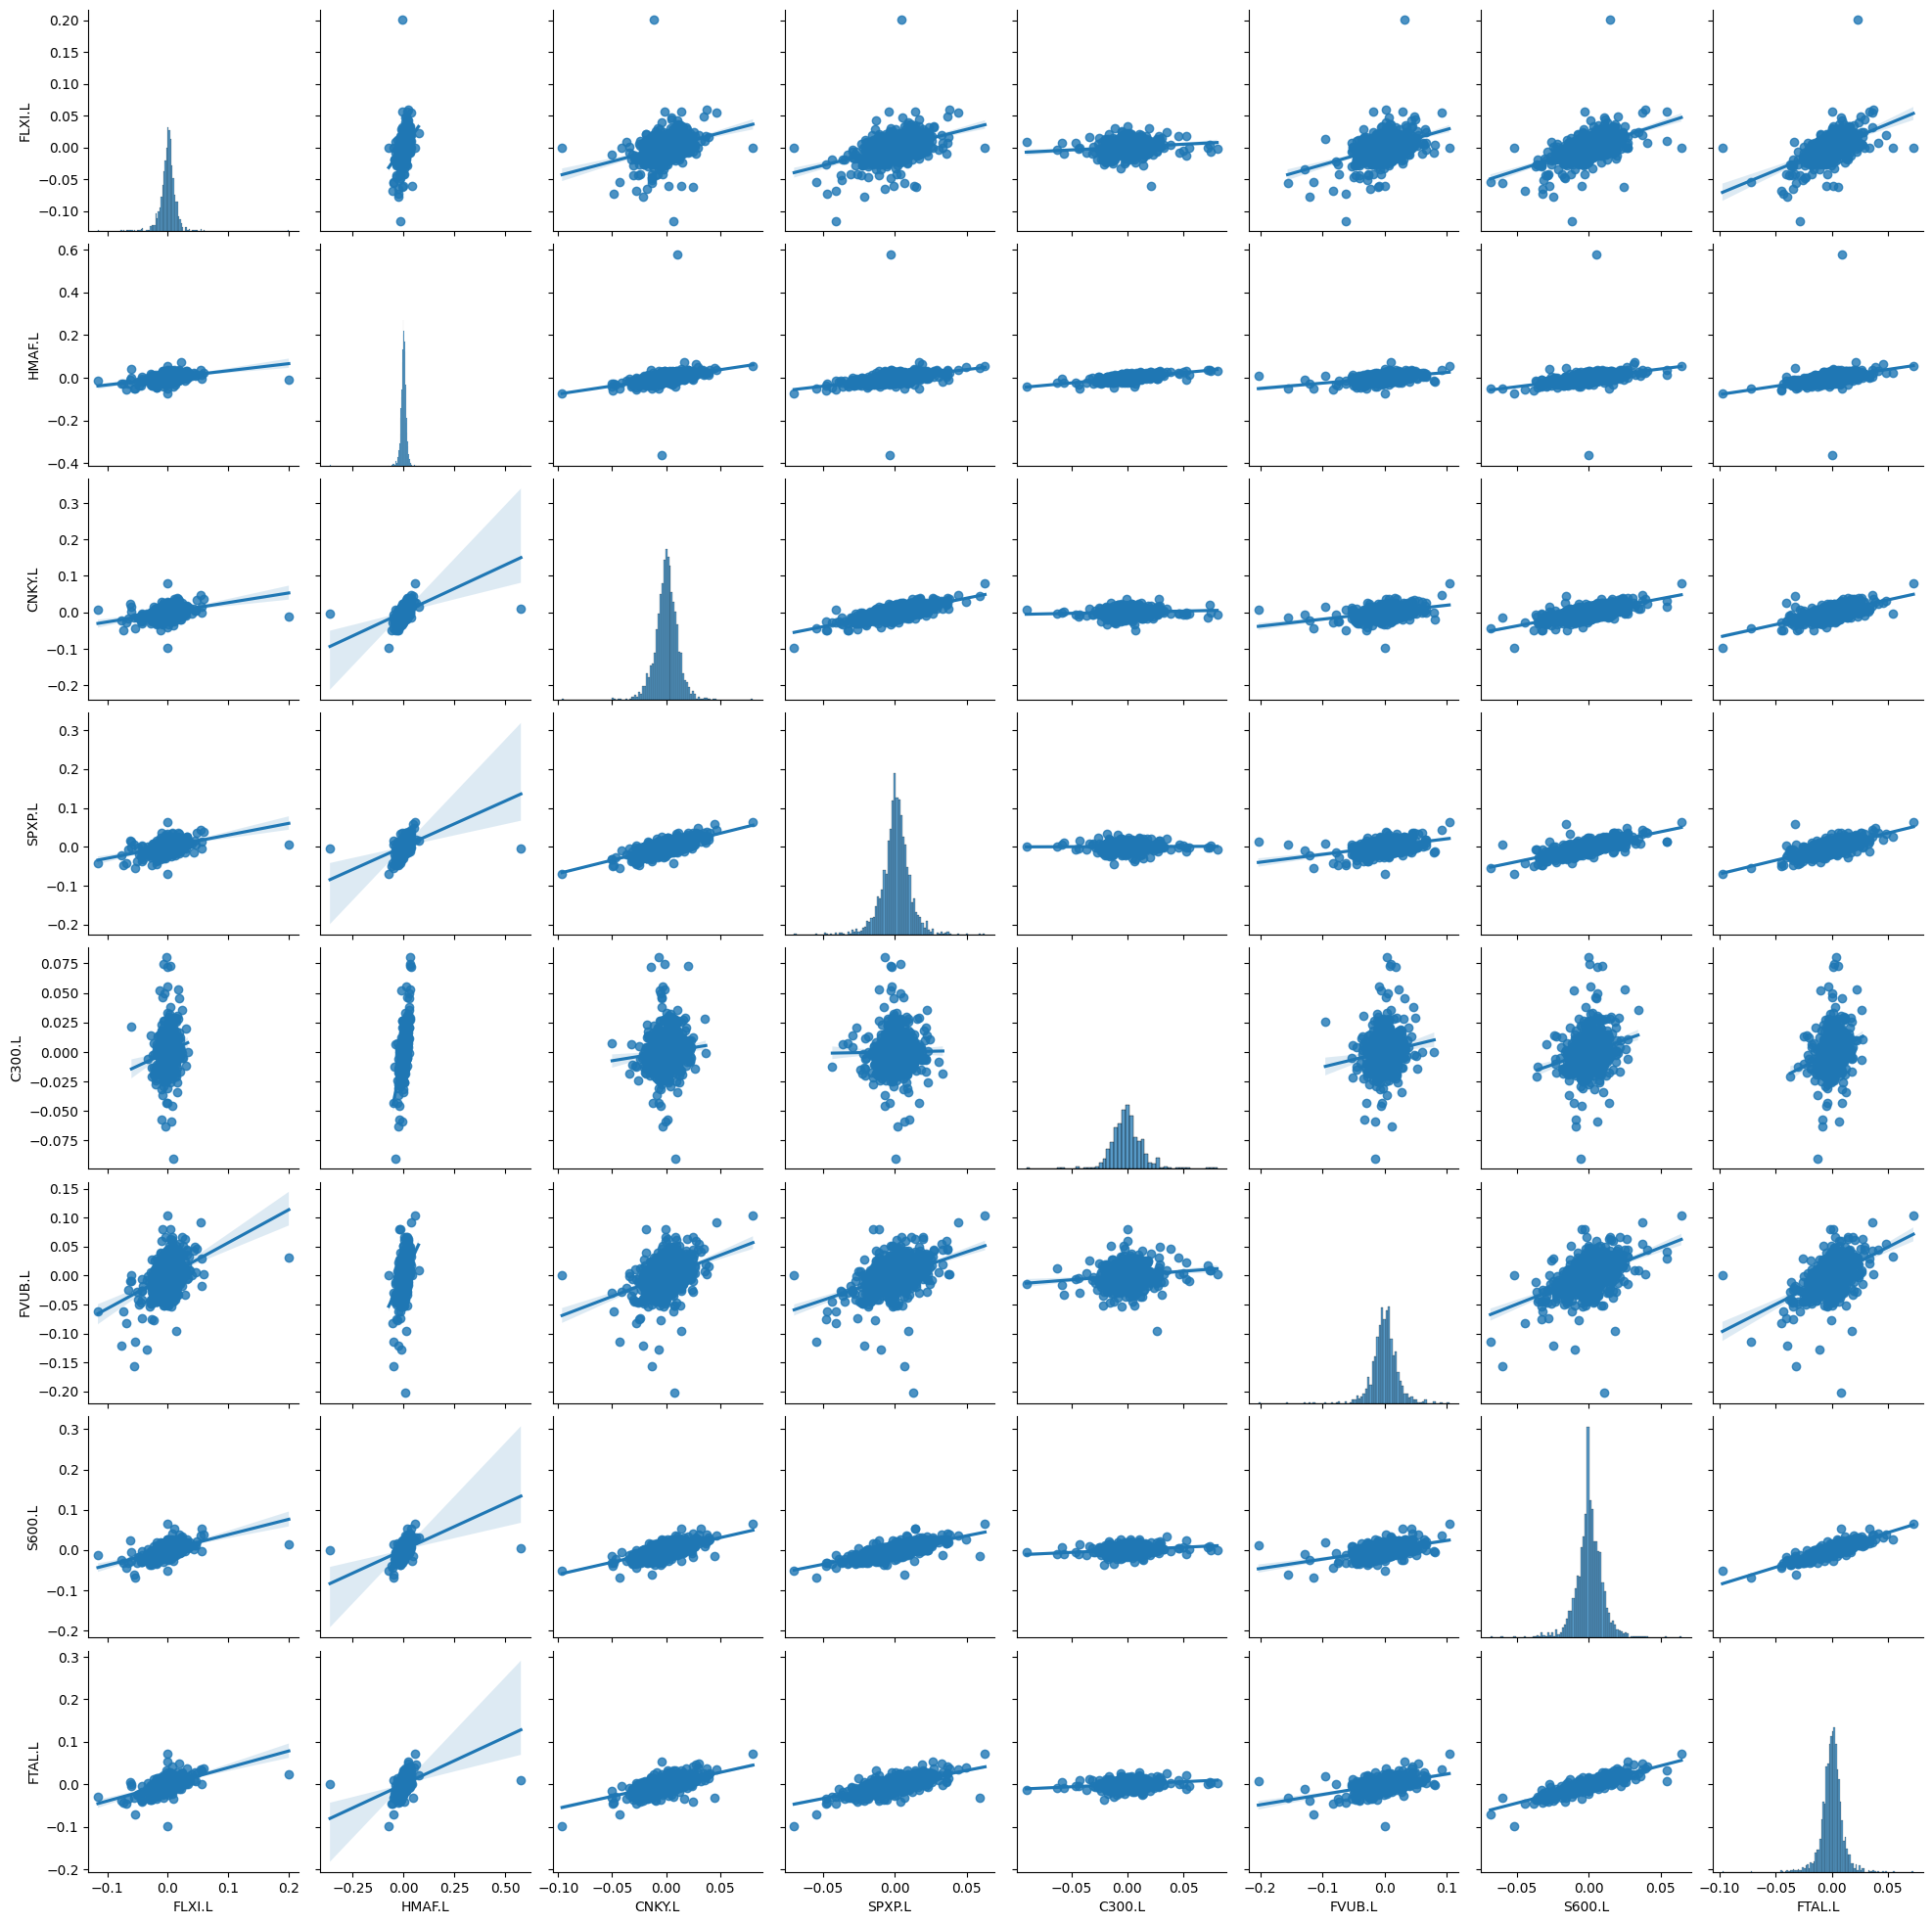

In [22]:
# Pairplots
sns.pairplot(daily_returns_df, kind = 'reg')
plt.show()

In [23]:
yf_df

Ticker,FLXI.L,HMAF.L,CNKY.L,SPXP.L,C300.L,FVUB.L,S600.L,FTAL.L
Date,,,,,,,,
2015-01-16,NaN,23.980000,8547.0,22129.0,NaN,NaN,5009.0,38.299999
2015-01-19,NaN,23.750000,8566.0,22262.5,NaN,NaN,5049.0,38.470001
2015-01-20,NaN,23.900000,8599.5,22164.0,NaN,NaN,5058.0,38.759998
2015-01-21,NaN,24.387501,8643.5,22491.0,NaN,NaN,5121.0,39.209999
2015-01-22,NaN,24.740000,8732.0,22759.5,NaN,NaN,5155.0,39.689999
...,...,...,...,...,...,...,...,...
2025-01-10,42.549999,39.674999,20186.0,94060.5,4.61750,16.841000,10447.0,68.364998
2025-01-13,41.767502,39.470001,20147.0,93904.5,4.62625,17.059000,10393.0,68.160004
2025-01-14,42.285000,39.924999,20118.0,94251.0,4.74875,17.035000,10436.0,67.980003


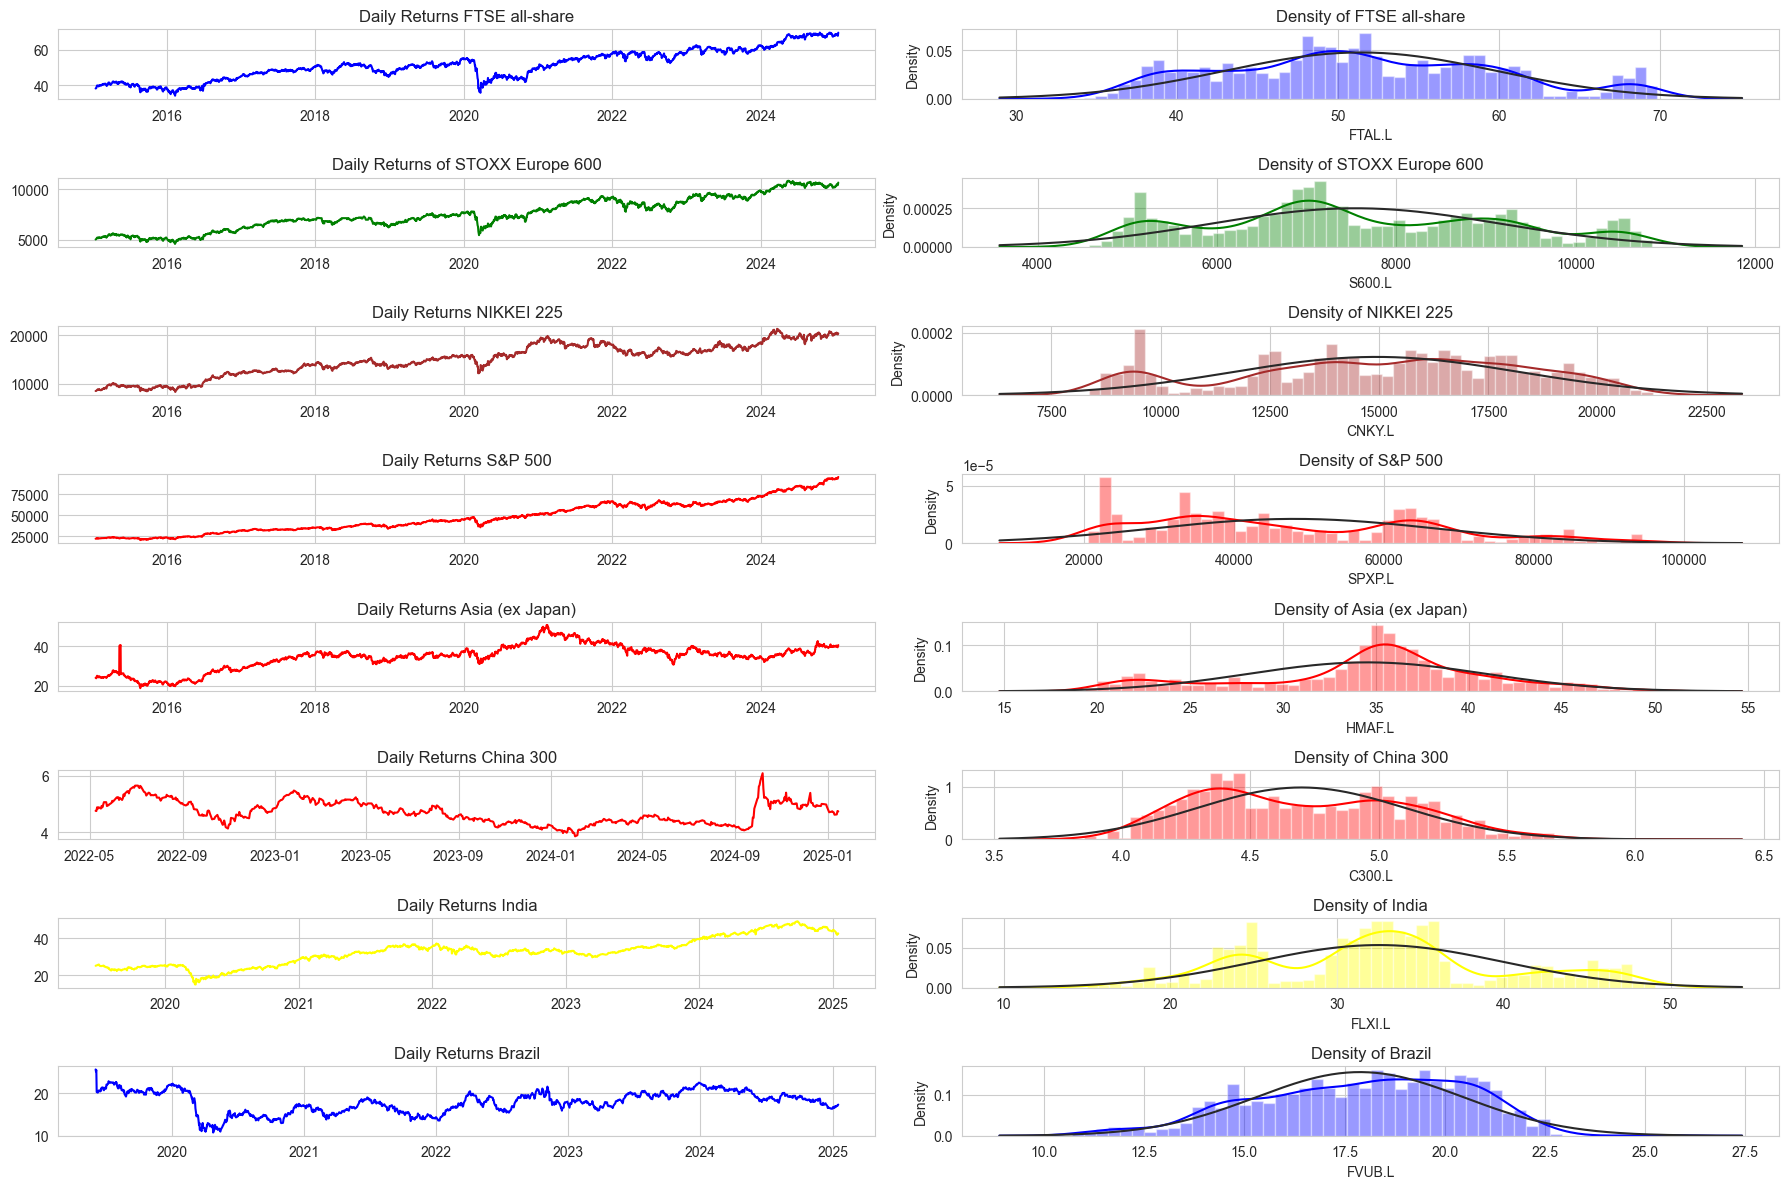

In [50]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(18,12))

    axes[0][0].plot(yf_df['FTAL.L'], color='blue')
    axes[0][0].set_title('Daily Returns FTSE all-share')

    sns.distplot(yf_df['FTAL.L'], norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of FTSE all-share')

    
    axes[1][0].plot(yf_df['S600.L'], color='green')
    axes[1][0].set_title('Daily Returns of STOXX Europe 600')

    sns.distplot(yf_df['S600.L'], norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of STOXX Europe 600')

    
    axes[2][0].plot(yf_df['CNKY.L'], color='brown')
    axes[2][0].set_title('Daily Returns NIKKEI 225')

    sns.distplot(yf_df['CNKY.L'], norm_hist=True, fit=stats.norm, color='brown',
                bins=50, ax=axes[2][1])
    axes[2][1].set_title('Density of NIKKEI 225')

    
    axes[3][0].plot(yf_df['SPXP.L'], color='red')
    axes[3][0].set_title('Daily Returns S&P 500')

    sns.distplot(yf_df['SPXP.L'], norm_hist=True, fit=stats.norm, color='red',
                bins=50, ax=axes[3][1])
    axes[3][1].set_title('Density of S&P 500')

    axes[4][0].plot(yf_df['HMAF.L'], color='red')
    axes[4][0].set_title('Daily Returns Asia (ex Japan)')

    sns.distplot(yf_df['HMAF.L'], norm_hist=True, fit=stats.norm, color='red',
                bins=50, ax=axes[4][1])
    axes[4][1].set_title('Density of Asia (ex Japan)')

    
    axes[5][0].plot(yf_df['C300.L'], color='red')
    axes[5][0].set_title('Daily Returns China 300')

    sns.distplot(yf_df['C300.L'], norm_hist=True, fit=stats.norm, color='red',
                bins=50, ax=axes[5][1])
    axes[5][1].set_title('Density of China 300')

    
    axes[6][0].plot(yf_df['FLXI.L'], color='yellow')
    axes[6][0].set_title('Daily Returns India')

    sns.distplot(yf_df['FLXI.L'], norm_hist=True, fit=stats.norm, color='yellow',
                bins=50, ax=axes[6][1])
    axes[6][1].set_title('Density of India')

    axes[7][0].plot(yf_df['FVUB.L'], color='blue')
    axes[7][0].set_title('Daily Returns Brazil')

    sns.distplot(yf_df['FVUB.L'], norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[7][1])
    axes[7][1].set_title('Density of Brazil') 
    
    plt.tight_layout()
    plt.show()

### check for dividends - check all ETFs reinvest dividends i.e. accumulate (acc)

In [25]:
ticker_list

['SPXP.L',
 'FTAL.L',
 'CNKY.L',
 'S600.L',
 'C300.L',
 'HMAF.L',
 'FLXI.L',
 'FVUB.L']

In [26]:
yf_dividend = pd.DataFrame()   # initialize dataframe

for i in ticker_list:
    x = pd.DataFrame(yf.Ticker(i).dividends)
    x = x.rename(columns={"Dividends":i})
    yf_dividend = pd.concat([yf_dividend,x], axis=1)
    if len(x) > 0:
        print('{:>8}\t- dividends'.format(i))
    else:
        print('{:>8}\t- no dividends'.format(i))             

  SPXP.L	- no dividends
  FTAL.L	- no dividends
  CNKY.L	- no dividends
  S600.L	- no dividends
  C300.L	- no dividends
  HMAF.L	- no dividends
  FLXI.L	- no dividends
  FVUB.L	- no dividends


In [27]:
yf_dividend

,SPXP.L,FTAL.L,CNKY.L,S600.L,C300.L,HMAF.L,FLXI.L,FVUB.L
Date,,,,,,,,


### check currencies

In [28]:
tickers = yf.Tickers(ticker_symbols)

In [29]:
tickers.tickers['SPXP.L'].info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 95526.5,
 'open': 96456.0,
 'dayLow': 95843.0,
 'dayHigh': 96568.0,
 'regularMarketPreviousClose': 95526.5,
 'regularMarketOpen': 96456.0,
 'regularMarketDayLow': 95843.0,
 'regularMarketDayHigh': 96568.0,
 'volume': 1718,
 'regularMarketVolume': 1718,
 'averageVolume': 2941,
 'averageVolume10days': 2979,
 'averageDailyVolume10Day': 2979,
 'bid': 96063.0,
 'ask': 96177.0,
 'fiftyTwoWeekLow': 72735.0,
 'fiftyTwoWeekHigh': 96568.0,
 'fiftyDayAverage': 93350.59,
 'twoHundredDayAverage': 85913.51,
 'currency': 'GBp',
 'fundFamily': 'Invesco Investment Management Limited',
 'fundInceptionDate': 1593475200,
 'legalType': 'Exchange Traded Fund',
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'SPXP.L',
 'underlyingSymbol': 'SPXP.L',
 'shortName': 'INVESCO MARKETS PLC INVESCO S&P',
 'longName': 'Invesco S&P 500 UCITS ETF',
 'firstTradeDateEpochUtc': 1405321200,
 'timeZoneFullName': 'Europe/London',
 'timeZoneShortName': 'GMT',
 'uuid': '

In [30]:
tickers.tickers['FTAL.L'].info

{'phone': '+353 1 776 3000',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 68.95,
 'open': 68.88,
 'dayLow': 68.88,
 'dayHigh': 69.77,
 'regularMarketPreviousClose': 68.95,
 'regularMarketOpen': 68.88,
 'regularMarketDayLow': 68.88,
 'regularMarketDayHigh': 69.77,
 'trailingPE': 0.16272876,
 'volume': 6771,
 'regularMarketVolume': 6771,
 'averageVolume': 8875,
 'averageVolume10days': 14348,
 'averageDailyVolume10Day': 14348,
 'bid': 69.54,
 'ask': 69.62,
 'totalAssets': 485574816,
 'fiftyTwoWeekLow': 54.6595,
 'fiftyTwoWeekHigh': 70.6,
 'fiftyDayAverage': 68.4052,
 'twoHundredDayAverage': 67.902824,
 'navPrice': 68.83635,
 'currency': 'GBP',
 'ytdReturn': 0.0087783,
 'beta3Year': 0.98,
 'fundFamily': 'State Street Global Advisors Europe Limited',
 'fundInceptionDate': 1524700800,
 'legalType': 'Exchange Traded Fund',
 'threeYearAverageReturn': 0.055472102,
 'fiveYearAverageReturn': 0.045034,
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'FTAL.L',
 'underlyingSymbol': 'FTAL

In [31]:
tickers.tickers['CNKY.L'].info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 20274.5,
 'open': 20489.0,
 'dayLow': 20331.0,
 'dayHigh': 20489.0,
 'regularMarketPreviousClose': 20274.5,
 'regularMarketOpen': 20489.0,
 'regularMarketDayLow': 20331.0,
 'regularMarketDayHigh': 20489.0,
 'volume': 312,
 'regularMarketVolume': 312,
 'averageVolume': 1236,
 'averageVolume10days': 473,
 'averageDailyVolume10Day': 473,
 'bid': 20339.0,
 'ask': 20354.0,
 'bidSize': 14400,
 'askSize': 514400,
 'totalAssets': 52038213632,
 'fiftyTwoWeekLow': 16000.0,
 'fiftyTwoWeekHigh': 21362.0,
 'fiftyDayAverage': 20137.47,
 'twoHundredDayAverage': 19759.21,
 'navPrice': 38604.195,
 'currency': 'GBp',
 'fundFamily': 'BlackRock Asset Management Ireland - ETF',
 'fundInceptionDate': 1264377600,
 'legalType': 'Exchange Traded Fund',
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'CNKY.L',
 'underlyingSymbol': 'CNKY.L',
 'shortName': 'ISHARES VII PLC ISHRS NIKKEI 22',
 'longName': 'iShares VII PLC - iShares Nikkei 225 ETF JPY Acc',
 '

In [32]:
tickers.tickers['S600.L'].info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 10554.0,
 'open': 10638.0,
 'dayLow': 10636.0,
 'dayHigh': 10652.0,
 'regularMarketPreviousClose': 10554.0,
 'regularMarketOpen': 10638.0,
 'regularMarketDayLow': 10636.0,
 'regularMarketDayHigh': 10652.0,
 'volume': 1165,
 'regularMarketVolume': 1165,
 'averageVolume': 1942,
 'averageVolume10days': 1258,
 'averageDailyVolume10Day': 1258,
 'bid': 10644.0,
 'ask': 10650.0,
 'totalAssets': 462375008,
 'fiftyTwoWeekLow': 9531.0,
 'fiftyTwoWeekHigh': 10864.0,
 'fiftyDayAverage': 10308.94,
 'twoHundredDayAverage': 10478.415,
 'currency': 'GBp',
 'fundFamily': 'Invesco Investment Management Limited',
 'fundInceptionDate': 1238544000,
 'legalType': 'Exchange Traded Fund',
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'S600.L',
 'underlyingSymbol': 'S600.L',
 'shortName': 'INVESCO MARKETS PLC INVESCO STO',
 'longName': 'Invesco STOXX Europe 600 UCITS ETF',
 'firstTradeDateEpochUtc': 1404370800,
 'timeZoneFullName': 'Europe/London',
 't

In [33]:
tickers.tickers['C300.L'].info

{'exchange': 'LSE',
 'quoteType': 'MUTUALFUND',
 'symbol': 'C300.L',
 'underlyingSymbol': 'C300.L',
 'shortName': 'C300.L,0P0001P11T,0',
 'longName': 'Invesco Markets plc - Invesco S&P China A 300 Swap UCITS ETF',
 'firstTradeDateEpochUtc': 1652079600,
 'timeZoneFullName': 'Europe/London',
 'timeZoneShortName': 'GMT',
 'uuid': '51e1b18d-9dad-3afc-b50b-412ccd71f406',
 'messageBoardId': 'finmb_1761627434',
 'maxAge': 86400,
 'trailingPegRatio': None}

In [34]:
tickers.tickers['HMAF.L'].info

{'phone': '(02)2325-7888',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 40.215,
 'open': 40.78,
 'dayLow': 40.59,
 'dayHigh': 40.78,
 'regularMarketPreviousClose': 40.215,
 'regularMarketOpen': 40.78,
 'regularMarketDayLow': 40.59,
 'regularMarketDayHigh': 40.78,
 'volume': 23,
 'regularMarketVolume': 23,
 'averageVolume': 1186,
 'averageVolume10days': 2449,
 'averageDailyVolume10Day': 2449,
 'bid': 40.53,
 'ask': 40.61,
 'bidSize': 450000,
 'askSize': 450000,
 'totalAssets': 132449672,
 'fiftyTwoWeekLow': 32.167,
 'fiftyTwoWeekHigh': 42.91,
 'fiftyDayAverage': 39.8283,
 'twoHundredDayAverage': 38.288025,
 'navPrice': 49.0096,
 'currency': 'GBP',
 'fundFamily': 'HSBC Investment Funds (Luxembourg) S.A.',
 'fundInceptionDate': 1657584000,
 'legalType': 'Exchange Traded Fund',
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'HMAF.L',
 'underlyingSymbol': 'HMAF.L',
 'shortName': 'HSBC ETFS PLC HSBC MSCI AC FAR ',
 'longName': 'HSBC MSCI AC FAR EAST ex JAPAN UCITS ETF',
 'firstT

In [35]:
tickers.tickers['FLXI.L'].info # india

{'phone': '+46 (0) 8 545 012 30',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 42.58,
 'open': 42.705,
 'dayLow': 42.4,
 'dayHigh': 42.705,
 'regularMarketPreviousClose': 42.58,
 'regularMarketOpen': 42.705,
 'regularMarketDayLow': 42.4,
 'regularMarketDayHigh': 42.705,
 'trailingPE': 0.24362125,
 'volume': 11866,
 'regularMarketVolume': 11866,
 'averageVolume': 131802,
 'averageVolume10days': 80379,
 'averageDailyVolume10Day': 80379,
 'bid': 42.405,
 'ask': 42.48,
 'totalAssets': 1252356480,
 'fiftyTwoWeekLow': 39.26,
 'fiftyTwoWeekHigh': 49.255,
 'fiftyDayAverage': 44.5853,
 'twoHundredDayAverage': 45.343327,
 'navPrice': 42.27,
 'currency': 'USD',
 'ytdReturn': -0.0272987,
 'beta3Year': 0.9,
 'fundFamily': 'Franklin Templeton International Services S.à r.l.',
 'fundInceptionDate': 1561420800,
 'legalType': 'Exchange Traded Fund',
 'threeYearAverageReturn': 0.0505211,
 'fiveYearAverageReturn': 0.1062316,
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'FLXI.L',
 'underlyi

In [36]:
tickers.tickers['FVUB.L'].info # brazil

{'phone': '+46 (0) 8 545 012 30',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 17.213,
 'open': 17.61181,
 'dayLow': 17.45,
 'dayHigh': 17.662,
 'regularMarketPreviousClose': 17.213,
 'regularMarketOpen': 17.61181,
 'regularMarketDayLow': 17.45,
 'regularMarketDayHigh': 17.662,
 'volume': 8531,
 'regularMarketVolume': 8531,
 'averageVolume': 2132,
 'averageVolume10days': 2698,
 'averageDailyVolume10Day': 2698,
 'bid': 17.302,
 'ask': 17.378,
 'totalAssets': 28821872,
 'fiftyTwoWeekLow': 16.218,
 'fiftyTwoWeekHigh': 22.075,
 'fiftyDayAverage': 17.3885,
 'twoHundredDayAverage': 18.767223,
 'navPrice': 21.45,
 'currency': 'GBP',
 'fundFamily': 'Franklin Templeton International Services S.à r.l.',
 'fundInceptionDate': 1559606400,
 'legalType': 'Exchange Traded Fund',
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'FVUB.L',
 'underlyingSymbol': 'FVUB.L',
 'shortName': 'FRANKLIN TEMPLETON ICAV FRK FTS',
 'longName': 'Franklin FTSE Brazil UCITS ETF',
 'firstTradeDateEpochUtc': 1

In [37]:
ticker_info_df

,index,symbol,symbol_name,symbol_type,symbol_name_full,unit,website
0,6,SPXP.L,S&P500,ETF,Invesco S&P 500 ETF Acc,GBP,NaN
1,14,FTAL.L,FTSE all-share,ETF,SPDR FTSE UK All Share UCITS ETF Acc,GBP,NaN
2,17,CNKY.L,Nikkei 225,ETF,iShares VII PLC - iShares Nikkei 225 ETF JPY Acc,GBP,NaN
3,19,S600.L,Stoxx 600,ETF,Invesco ETF (S600.L),GBP,https://stoxx.com/index/sxxp/
4,47,C300.L,China,ETF,Invesco Markets plc - Invesco S&P China A 300 ...,GBP,NaN
5,49,HMAF.L,Asia,ETF,HSBC MSCI AC FAR EAST ex JAPAN UCITS ETF,GBP,NaN
6,50,FLXI.L,India,ETF,Franklin FTSE India UCITS ETF,GBP,NaN
7,51,FVUB.L,Brazil,ETF,Franklin FTSE Brazil UCITS ETF,GBP,NaN


### correlation

### fit curves

Text(0.5, 1.0, 'daily % returns 10yrs')

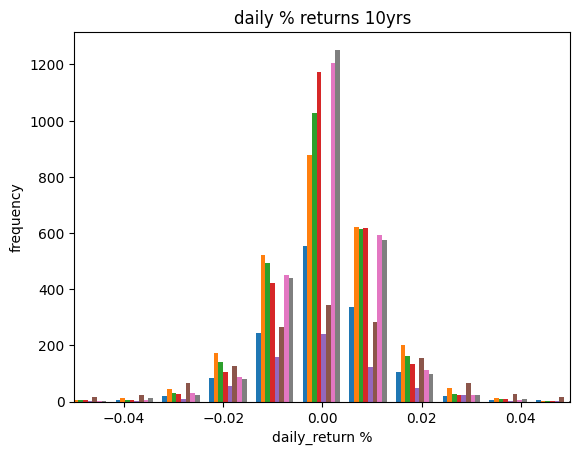

In [38]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(daily_returns_df,bins=100)
#plt.ylim(0,1500)
plt.xlim(-0.05,0.05)
plt.xlabel('daily_return %')
plt.ylabel('frequency')
plt.title('daily % returns 10yrs')

# Initialize distfit - ftse
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(daily_returns_df['FTAL.L'].dropna())

print(dist.summary)

# Plot results
dist.plot()
plt.show()

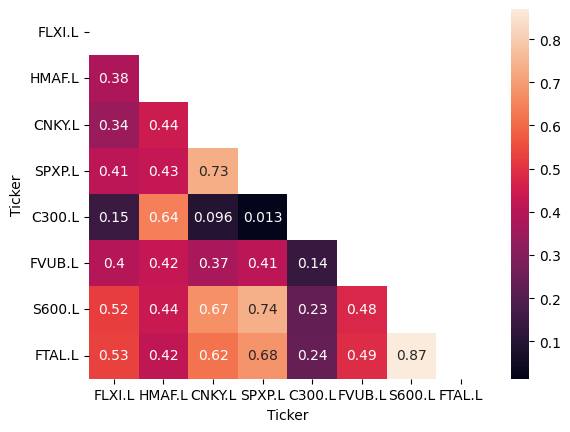

In [39]:
# Correlation Matrix
corr = daily_returns_df.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask = mask)
plt.show()

### portfolio - markowitz

In [40]:
weights = [0.2, 0.2, 0.2, 0.2,0.2,0.2,0.2,0.2] # Defining weights for each stock
portfolio = yf_df.dot(weights) # Creating portfolio multiplying each stock for its respective weight 
portfolio # Displaying portfolio's daily returns

Date
2015-01-16             NaN
2015-01-19             NaN
2015-01-20             NaN
2015-01-21             NaN
2015-01-22             NaN
                  ...     
2025-01-10    24973.109699
2025-01-13    24923.116551
2025-01-14    24995.394750
2025-01-15    25305.738550
2025-01-16             NaN
Length: 2527, dtype: float64

In [41]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(yf_df) #expected returns
S = risk_models.sample_cov(yf_df) #Covariance matrix

In [42]:
# Visualizing the annualized expected returns
mu

Ticker
FLXI.L    0.099473
HMAF.L    0.053817
CNKY.L    0.090357
SPXP.L    0.157645
C300.L   -0.001546
FVUB.L   -0.067238
S600.L    0.078175
FTAL.L    0.061659
dtype: float64

In [43]:
# Visualizing the covariance matrix
S

Ticker,FLXI.L,HMAF.L,CNKY.L,SPXP.L,C300.L,FVUB.L,S600.L,FTAL.L
Ticker,,,,,,,,
FLXI.L,0.050885,0.016835,0.013441,0.015182,0.005061,0.028921,0.019282,0.019895
HMAF.L,0.016835,0.083120,0.021529,0.019444,0.027373,0.027666,0.019205,0.018413
CNKY.L,0.013441,0.021529,0.028328,0.019547,0.003539,0.021178,0.017295,0.015961
SPXP.L,0.015182,0.019444,0.019547,0.025023,0.000437,0.022196,0.017771,0.016522
C300.L,0.005061,0.027373,0.003539,0.000437,0.056913,0.008404,0.007230,0.006818
FVUB.L,0.028921,0.027666,0.021178,0.022196,0.008404,0.110594,0.025765,0.026701
S600.L,0.019282,0.019205,0.017295,0.017771,0.007230,0.025765,0.023174,0.020324
FTAL.L,0.019895,0.018413,0.015961,0.016522,0.006818,0.026701,0.020324,0.023554


In [44]:
# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization 

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('FLXI.L', 0.01448),
             ('HMAF.L', 0.0),
             ('CNKY.L', 0.0),
             ('SPXP.L', 0.98552),
             ('C300.L', 0.0),
             ('FVUB.L', 0.0),
             ('S600.L', 0.0),
             ('FTAL.L', 0.0)])